In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt


In [2]:
# Import, clean, and filter data as necessary 
df = pd.read_csv('data/chicago_crime_2019_2023.csv')
df.dropna(subset=['community_area', 'unique_key'], inplace=True)
df['community_area'] = df['community_area'].astype(int)

In [3]:
# replace 'CRIM SEXUAL ASSAULT' with 'CRIMINAL SEXUAL ASSAULT' to not have separate counts
df['primary_type'] = df['primary_type'].replace('CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT')

In [4]:
# convert from utc to datetime and remove time zone effect
df['date'] = pd.to_datetime(df['date'], utc=True)
df['date'] = df['date'].dt.tz_localize(None)
df.head()

,unique_key,date,block,primary_type,description,ward,community_area
0,12465794,2021-08-27 10:00:00,104XX S MICHIGAN AVE,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,9.0,49
1,12788122,2022-08-08 11:42:00,007XX E 103RD ST,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,9.0,50
2,12502168,2021-10-04 08:10:00,0000X W 103RD ST,ROBBERY,ATTEMPT ARMED - HANDGUN,34.0,49
3,13001633,2023-03-05 05:15:00,009XX E 104TH ST,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,9.0,50
4,11830976,2019-09-16 11:53:00,009XX E 104TH ST,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,9.0,50


In [5]:
# adding csv for community area numbers
comm_areas = pd.read_csv('data/CommAreas.csv')

# merging community name to df
df1 = pd.merge(df, comm_areas, on='community_area', how='left')

In [6]:
df1['month'] = df1['date'].dt.strftime('%B')
df1['year'] = df1['date'].dt.strftime('%Y')

In [7]:
# getting monthly counts of crime for 2019
months2019_df = df1[df1['year'] == '2019']
months2019_df = pd.DataFrame(months2019_df['month'].value_counts())
months2019_df.reset_index(level=0,inplace=True)

# reordering rows to be in chronological order by month
custom_month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
months2019_df['month'] = pd.Categorical(months2019_df['month'], categories=custom_month_order, ordered=True)
months2019_df = months2019_df.sort_values('month')
months2019_df.reset_index(drop=True, inplace=True)

months2019_df['year'] = '2019'
months2019_df['month'] = months2019_df['month'].astype(str)
months2019_df['month'] = months2019_df['month'] + ' ' + months2019_df['year']
months2019_df = months2019_df.drop(columns=['year'])

# repeating two previous steps for 2020
months2020_df = df1[df1['year'] == '2020']
months2020_df = pd.DataFrame(months2020_df['month'].value_counts())
months2020_df.reset_index(level=0,inplace=True)

months2020_df['month'] = pd.Categorical(months2020_df['month'], categories=custom_month_order, ordered=True)
months2020_df = months2020_df.sort_values('month')
months2020_df.reset_index(drop=True, inplace=True)

months2020_df['year'] = '2020'
months2020_df['month'] = months2020_df['month'].astype(str)
months2020_df['month'] = months2020_df['month'] + ' ' + months2020_df['year']
months2020_df = months2020_df.drop(columns=['year'])

# repeating two previous steps for 2021
months2021_df = df1[df1['year'] == '2021']
months2021_df = pd.DataFrame(months2021_df['month'].value_counts())
months2021_df.reset_index(level=0,inplace=True)

months2021_df['month'] = pd.Categorical(months2021_df['month'], categories=custom_month_order, ordered=True)
months2021_df = months2021_df.sort_values('month')
months2021_df.reset_index(drop=True, inplace=True)

months2021_df['year'] = '2021'
months2021_df['month'] = months2021_df['month'].astype(str)
months2021_df['month'] = months2021_df['month'] + ' ' + months2021_df['year']
months2021_df = months2021_df.drop(columns=['year'])

# repeating two previous steps for 2022
months2022_df = df1[df1['year'] == '2022']
months2022_df = pd.DataFrame(months2022_df['month'].value_counts())
months2022_df.reset_index(level=0,inplace=True)

months2022_df['month'] = pd.Categorical(months2022_df['month'], categories=custom_month_order, ordered=True)
months2022_df = months2022_df.sort_values('month')
months2022_df.reset_index(drop=True, inplace=True)

months2022_df['year'] = '2022'
months2022_df['month'] = months2022_df['month'].astype(str)
months2022_df['month'] = months2022_df['month'] + ' ' + months2022_df['year']
months2022_df = months2022_df.drop(columns=['year'])

# repeating two previous steps for 2023
months2023_df = df1[df1['year'] == '2023']
months2023_df = pd.DataFrame(months2023_df['month'].value_counts())
months2023_df.reset_index(level=0,inplace=True)

months2023_df['month'] = pd.Categorical(months2023_df['month'], categories=custom_month_order, ordered=True)
months2023_df = months2023_df.sort_values('month')
months2023_df.reset_index(drop=True, inplace=True)
months2023_df = months2023_df.drop([9]) 

months2023_df['year'] = '2023'
months2023_df['month'] = months2023_df['month'].astype(str)
months2023_df['month'] = months2023_df['month'] + ' ' + months2023_df['year']
months2023_df = months2023_df.drop(columns=['year'])

months2022_df

,month,count
0,January 2022,15618
1,February 2022,15237
2,March 2022,18386
3,April 2022,18000
4,May 2022,20144
5,June 2022,20791
6,July 2022,22276
7,August 2022,22305
8,September 2022,22340
9,October 2022,23203


In [8]:
# stacking togther years 2019-2023
concatenated_df = pd.concat([months2019_df, months2020_df, months2021_df, months2022_df, months2023_df])
concatenated_df.reset_index().drop(columns='index').tail()

,month,count
52,May 2023,22061
53,June 2023,22448
54,July 2023,23730
55,August 2023,23781
56,September 2023,21869


In [9]:
# reading in monthly average temps from weather.gov
avg_temps = pd.read_csv('data/monthly_weather.csv')

# have to split one column into two
avg_temps[['month', 'avg_temp (F)']] = avg_temps['month\tavg_temp'].str.split('\t', expand=True)

avg_temps = avg_temps.drop(columns='month\tavg_temp')
avg_temps.head()

,month,avg_temp (F)
0,January 2019,21
1,February 2019,25.9
2,March 2019,34.3
3,April 2019,49.7
4,May 2019,58


In [10]:
# merge monthly total crimes and monthly average temps
regression_df = pd.merge(concatenated_df, avg_temps, on='month')
regression_df.head()

,month,count,avg_temp (F)
0,January 2019,19764,21
1,February 2019,18441,25.9
2,March 2019,20455,34.3
3,April 2019,21041,49.7
4,May 2019,23678,58


In [11]:
# checking for outliers in monthly total crimes
Q1 = np.percentile(regression_df['count'], 25)
Q3 = np.percentile(regression_df['count'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = np.where((regression_df['count'] < lower_bound) | (regression_df['count'] > upper_bound))
lower_bound

11973.5

In [12]:
# set up linear regression on monthly crime totals vs average monthly temperature
regression_df['avg_temp (F)'] = regression_df['avg_temp (F)'].astype(float)
regression_df['count'] = regression_df['count'].astype(int)

slope, intercept, r, p, std_err = linregress(regression_df['avg_temp (F)'], regression_df['count'])

In [13]:
# setting line equattion for estimating crime count based on avg temp of month
temp = regression_df['avg_temp (F)']
predicted_count = (slope * temp) + intercept

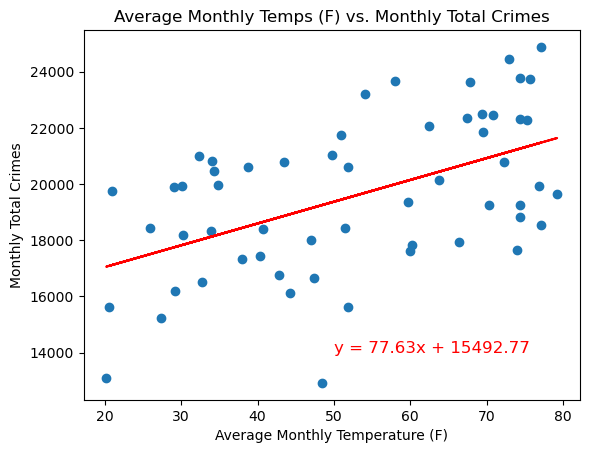

The correlation r value is: 0.5168584667727318


In [14]:
# Plot with linear regression line
# Import autolocator for xticks
from matplotlib.ticker import AutoLocator

line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.scatter(temp, regression_df['count'])
plt.plot(temp, predicted_count, "-", color='r')
plt.gca().xaxis.set_major_locator(AutoLocator())
plt.xlabel('Average Monthly Temperature (F)')
plt.ylabel('Monthly Total Crimes')
plt.title('Average Monthly Temps (F) vs. Monthly Total Crimes')
plt.annotate(line_eq, (50, 14000), fontsize=12,color='red')
plt.savefig('output/regressionscatter.png')
plt.show()

print(f'The correlation r value is: {r}')

## Correlation Discussion

There seems to be a moderate linear positive relationship between the average monthly temperature and the monthly total count of crimes. The r value and the scatter plot both indicate this. This seems to make sense as it gets warmer, I would think people are more likely to be out and drinking. The summer months are warmer but also high school and college students would be out of school so that may contribute as well.

## Hypothesis testing for correlation - T-test

$H_{o}$: There is not a linear relationship between average monthly temperature and monthly crime total. 

$H_{a}$: There is a linear relationship between average monthly temperature and monthly crime total. 


In [15]:
from scipy.stats import pearsonr, t
correlation, p_value = pearsonr(temp, regression_df['count'])
p_value

3.8507654168735615e-05

Since our p-value is so low and less than 0.05, we can reject the null hypothesis. There is sufficient evidence that there is a linear relationship between the average monthly temperature and monthly crime total.